<a href="https://colab.research.google.com/github/muralianamala/pythonlearning/blob/main/DAV-3/Copy_of_DAV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pop_avg = 65
pop_stddev = 2.5
sample_n = 20
sample_avg = 64.5
alpha = 0.05


In [ ]:
#z = (sample_avg - pop_avg)/ (pop_stddev/sqrt(sample_n))

In [ ]:
import math

In [ ]:
z = (sample_avg - pop_avg) / (pop_stddev/math.sqrt(sample_n))
z

-0.8944271909999159

In [ ]:
from scipy.stats import norm

In [ ]:
p_value = 1 - norm.cdf(z)
p_value

0.8144533152386513

In [ ]:
if p_value < alpha:
  print('Reject H0')
else:
  print('Accept H0')

Accept H0


In [ ]:
# Hypothesis framework
'''
1. Setup Null and alternate hypothesis
2. choose test statistics
3. select left/right/two tailed test
4. compute p-value
5. compare p-value with significance level (alpha) and Fail to reject or reject null hypothesis
   a. if alpha = 5% (significance level)
   b. 95% confidence level
'''

In [ ]:
# recap of CLT (Central limit theorem)
'''
mu - avg
se = sd/sqrt(n)
sigma(sample) = singma(population)/sqrt(no#)
'''

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, poisson, expon

In [ ]:
mu = 65
sd = 2.5
n = 50
se_50 = sd/np.sqrt(n)
se_5 = sd/np.sqrt(5)
se_50, se_5

(0.35355339059327373, 1.118033988749895)

# **Marketing case study**

#### <font color='purple'>Suppose there is a Retail Store Chain that sells Shampoo bottles</font>

This chain has **2000 stores** across India.

The parameters for weekly sales of the shampoo bottle were reported as:
- Mean: 1800
- Standard deviation: 100

This was calculated by analyzing a lot of historical data

<br>

As a Manager / Owner / Data Scientist, you want to increase these sales, to generate more revenue.

> <font color='purple'>**Q1. What are the techniques at your disposal?**</font>
- Hire a marketing team

But there is an important factor to consider. These marketing teams/firms are not cheap, and would add a significant cost.

It stands to reason that you would not straightaway hand over all 2000 stores to them.

You would want an assurance that their work actually does impact the sales, and generate enough revenue that it is feasible to hire them.

> <font color='purple'>**Q2. How would you get that assurance?**</font>

Perhaps you can allot them a few stores, and analyze the sale parameters (Mean and Standard deviation).

If results are good in a couple of weeks, then hire for all 2000 stores.


In [ ]:
'''
mu = 1800
sd = 100
Firm A:
  50 stores
  sold --> avg - 1850

Firm B:
  5 stores
  sold --> avg 1950
'''

In [ ]:
# Firm A
mu = 1800
sd = 100
# Step 1
# H0 = 1800
# Ha > 1800

# step 2
# distribution - Gaussian
se = sd/np.sqrt(50)
mu_abs = 1850

z= (1850 - 1800)/se

pval = 1 - norm.cdf(z)
pval

0.00020347600872250293

In [ ]:
alpha = 0.01
if pval < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Reject the null hypothesis


In [ ]:
# Firm B
# step 1
# H0 = 1800
# Ha > 1800
n_5 = 5
mu_b = 1800
sd_5 = 100
se_5 = sd_5/np.sqrt(n_5)

z = (1900 - 1800)/se_5
pval_5 = 1 - norm.cdf(z)

pval_5

0.0126736593387341

In [ ]:
alpha = 0.01
if pval_5 < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


# **CRITICAL VALUE**

In [ ]:
mu = 1800
sd = 100
n = 50
se = sd/np.sqrt(n)

pval = 0.01

#pval = 1 - norm.cdf(z)
z = norm.ppf(0.99)

# z = (x - 1800)/se
# x = (se * z) + 1800

x = (se * z) + 1800
x

1832.8995271426638

In [ ]:
# Firm B
mu = 1800
se_5 = sd/np.sqrt(5)

pval_5 = 1 - 0.01
z = norm.ppf(pval_5)

x_5 = (z * se_5) + 1900
x_5

2004.0374397133487

# **CONFIDENCE INTERVAL**

In [ ]:
# Given data
population_mean = 1800
sample_mean = 1850
population_stddev = 100
sample_size = np.sqrt(50)
aplha = 0.01 # significance level

# calculate critical value (Z) for a right tailed test at a given alpha level
z_critical = norm.ppf(1 - alpha)

# calculate margin error
margin_of_error = z_critical * (population_stddev / sample_size)

# calculate the confidence level
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Confidence interval: ", confidence_interval)

# Check if the population mean (1800) falls within the confidence interval

if confidence_interval[0] <= population_mean <= confidence_interval[1]:
    print("The population mean falls within the confidence interval. Then we fail to reject the null hypothesis")
else:
    print("The population mean does not fall within the confidence interval. Then we reject the null hypothesis")

Confidence interval:  (1817.1004728573362, 1882.8995271426638)
The population mean does not fall within the confidence interval. Then we reject the null hypothesis


In [ ]:
import numpy as np
from scipy.stats import norm

# Given data
population_mean = 1800
sample_mean = 1900
population_stddev = 100
sample_size = np.sqrt(5)
alpha = 0.01  # Significance level (1 - alpha will give us the confidence level)

# Calculate the critical value (Z) for a right-tailed test at the given alpha level
z_critical = norm.ppf(1 - alpha)

# Calculate the margin of error
margin_of_error = z_critical * (population_stddev / sample_size)

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Confidence Interval:", confidence_interval)

# Check if the population mean (1800) falls within the confidence interval

if confidence_interval[0] <= population_mean <= confidence_interval[1]:
    print("The population mean falls within the confidence interval. Then we fail to reject the null hypothesis")
else:
    print("The population mean does not fall within the confidence interval. Then we reject the null hypothesis")

Confidence Interval: (1795.9625602866513, 2004.0374397133487)
The population mean falls within the confidence interval. Then we fail to reject the null hypothesis


In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats import power

# Given data
alpha = 0.05  # Significance level (for a two-tailed test)
confidence_level = 1 - (alpha / 2)  # 95% confidence level
sample_size = 30  # Number of chocolate bars in the sample

# Calculate the z-critical value for a 5% significance level (as you did previously)
z_critical = np.abs(round(stats.norm.ppf(1 - alpha/2), 4))

# Calculate the sample mean (average weight of the chocolate bars)
data = [55, 45, 52, 48, 55, 52, 52, 53, 48, 52, 53, 47, 54, 51, 52, 51, 48, 52, 53, 54, 51, 51, 52, 54, 47, 52, 53, 48, 51, 54]
samp_mean = np.mean(data)
samp_std = np.std(data)

# Null hypothesis value (standard weight)
hypo_mean = 50

# Calculate the effect size (difference between sample mean and hypothesized mean)
effect_size = (samp_mean - hypo_mean) / samp_std
print("Effect size:",effect_size)

# Use 'zt_ind_solve_power()' to calculate the power of the z-test
# ratio=0 it implies that the function assumes equal sample sizes in both groups.
# In other words, it assumes that the number of observations in the two groups being compared is the same.
power = power.zt_ind_solve_power(effect_size=effect_size,
                                 nobs1=sample_size,
                                 alpha=alpha,
                                 ratio=0,
                                 alternative='two-sided')

print('Power of the test:', power)

Effect size: 0.5261336417646574
Power of the test: 0.8216812302268112


A country has a population average height of 65 inches with a standard deviation of 2.5. A person feels people from his state are shorter. He takes the average of 20 people and sees that it is 64.5.

At a 5% significance level (or 95% confidence level), can we conclude that people from his state are shorter, using the Z-test? What is the p-value?

In [ ]:
# Null Hypothesis (H0) - People from the person's state have height equal to that of the national average height (mu = 65)
# Alternative Hypothesis (Ha) : People from the person's state have shorter than the national average height (mu < 65)

mu = 65 # population mean
sd = 2.5
n = 20 # sample size

#standaed error
se = sd/np.sqrt(n)
#calculate Z-score
z = (64.5 - 65)/se
#cal p-value - left tailed test
p = norm.cdf(z)
print(se, z, norm.cdf(z))

if p < 0.05:
  print("reject")
else:
  print("accept")

0.5590169943749475 -0.8944271909999159 0.18554668476134878
accept


A French cafe has historically maintained that their average daily pastry production is at most 500.

With the installation of a new machine, they assert that the average daily pastry production has increased. The average number of pastries produced per day over a 70-day period was found to be 530.

Assume that the population standard deviation for the pastries produced per day is 125.

Perform a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05 to evaluate if there's sufficient evidence to support their claim of the new machine producing more than 500 pastries daily.

Note: Round off the z-score to two decimal places.

In [ ]:
# H0 - avg number of patries produced per day is less the or equal to 500 (mu <= 500)
# Ha - avg num of pastries produced more than 500 per day (mu > 500) - right taled test
mu = 500
n = 70
sd = 125
se = sd/np.sqrt(n)
z_critical = 1.64

z = (530 - 500)/se
z

if z > z_critical:
  print("reject")
else:
  print("accept")

reject


The Chai Point stall at Bengaluru airport estimates that each person visiting the store drinks an average of 1.7 small cups of tea.

Assume a population standard deviation of 0.5 small cups. A sample of 30 customers collected over a few days averaged 1.85 small cups of tea per person.

Test the claim using an appropriate test at an alpha = 0.05 significance value, with a critical z-score value of ±1.96.

Note: Round off the z-score to two decimal places.

In [ ]:
mu = 1.7
sd = 0.5
n = 30
mu_new = 1.85
alpha = 0.05
z_critical = 1.96
se = sd/np.sqrt(n)
z = (1.85 - 1.7)/se
print(z)

if z > z_critical:
  print("reject")
else:
  print("accept")

1.6431676725155
accept


A data scientist is looking at how a web application responds, with an average response time of 250 milliseconds and a standard deviation of 30 milliseconds.

Find the critical value for a 96% confidence level.

In [ ]:
mu = 250
sd = 30

print((1 - 0.96)/2)

z_critical = norm.ppf(1 - ((1 - 0.96)/2))
print(z_critical)

mu + (sd * z_critical)


0.020000000000000018
2.0537489106318225


311.61246731895466

It is known that the mean IQ of high school students is 100, and the standard deviation is 15.

A coaching institute claims that candidates who study there have more IQ than an average high school student. When the IQ of 50 candidates was calculated, the average turned out to be 110

Conduct an appropriate hypothesis test to test the institute’s claim, with a significance level of 5%

In [ ]:
mu = 100
sd = 15
n = 50
se = sd/np.sqrt(n)
z = (110 - 100)/se
print(z)
alpha = 0.05
p = 1 - norm.cdf(z)
print(p)

if p < alpha:
  print('reject H0')
else:
  print("accept")

4.714045207910317
1.2142337364462463e-06
reject H0


When smokers smoke, nicotine is transformed into cotinine, which can be tested.

The average cotinine level in a group of 50 smokers was 243.5 ng ml.

Assuming that the standard deviation is known to be 229.5 ng ml.

Test the assertion that the mean cotinine level of all smokers is equal to 300.0 ng ml, at 95% confidence.

In [ ]:
print(norm.ppf(0.05/2))

z = (243.5 - 300)/(229.5/np.sqrt(50))
print(z)

print(norm.cdf(z))

-1.9599639845400545
-1.7408075440976007
0.04085865957574815


In [ ]:
# Null Hypothesis (H0): The mean cotinine level of all smokers is equal to 300.0 ng/ml. (µ = 300.0 ng)
# Alternative Hypothesis (Ha): The mean cotinine level of all smokers is not equal to 300.0 ng/ml. (µ ≠ 300.0 ng)

import scipy.stats as stats

# Given values
sample_mean = 243.5  # Sample mean cotinine level
population_std = 229.5  # Known population standard deviation
population_mean = 300.0  # Hypothesized population mean
sample_size = 50  # Sample size
confidence_level = 0.95  # 95% confidence level

# Calculate the Z-score
standard_error = population_std / (sample_size**0.5)
Z = (sample_mean - population_mean) / standard_error

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(Z)))

# Determine whether to reject the null hypothesis
alpha = 1 - confidence_level
if p_value < alpha:
    conclusion = "Reject the null hypothesis which means the mean cotinine level of all smokers is not equal to 300.0 ng/ml "
else:
    conclusion = "Fail to reject the null hypothesis which means the mean cotinine level of all smokers is equal to 300.0 ng/ml. "

print(f"Z-score: {Z}")
print(f"P-value: {p_value}")
print(f"Conclusion: {conclusion}")


Z-score: -1.7408075440976007
P-value: 0.08171731915149638
Conclusion: Fail to reject the null hypothesis which means the mean cotinine level of all smokers is equal to 300.0 ng/ml. 


For a quality control analysis, a factory assesses the tensile strength of a sample of steel rods.

The sample exhibits a mean tensile strength of 750 MPa with a sample standard deviation of 50 MPa, while the known population mean is 800 MPa.

Calculate Cohen's d for this quality control study.

## **CLASS 3**

## **TWO SAMPLE Z-TEST**

Since $n_1 = 100$ and $n_2 = 90$, we can compute our test statistic, Z as: $Z$ = $\frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{σ_1^2}{n_1} + \frac{σ_2^2}{n_2}}}$

In [ ]:
'''
M1 and M2
H0 - mu1 = mu2
Ha - mu1 != mu2
n1 (sample_no_M1) = 100
n2 (sample_no_M2) = 90
x1 - mean of M1
x2 - mean of M2

Z = (x1 - x2) / np.sqrt((mu1**2/n1) + (mu2**2/n2))
Where,

Z: The z-score, a standard normal variable used to determine the probability of the observed difference between the two samples.
x¯1 : The mean of the first sample.
x¯2 : The mean of the second sample.
σ₁: The standard deviation of the first population.
σ₂: The standard deviation of the second population.
n₁: The size of the first sample.
n₂: The size of the second sample.
'''

In [ ]:
'''
H0 - mu1 (M1) = mu2 (M2)
Ha - mu1 (M1) != mu2 (M2)

- Normal distribution
- Two taled test
'''

In [1]:
import random
import numpy as np

# set a random seed for reproducability
random.seed(123)

# create an empty list to stroe recovery items
M1_data = []

#Generate 100 random recovery items
for _ in range(100):
  recovery_item = random.uniform(5.0,20.0) # generating values between 5 and 20
  M1_data.append(np.round(recovery_item,0))

print("M1 data", M1_data)

# create an empty list to stroe recovery items
M2_data = []

#Generate 90 random recovery items
for _ in range(90):
  recovery_item = random.uniform(5.0,30.0) # generating values between 5 and 30
  M2_data.append(np.round(recovery_item,0))

print("M2 data", M2_data)



M1 data [6.0, 6.0, 11.0, 7.0, 19.0, 6.0, 13.0, 10.0, 18.0, 7.0, 10.0, 10.0, 9.0, 5.0, 12.0, 6.0, 14.0, 6.0, 10.0, 12.0, 19.0, 6.0, 7.0, 17.0, 5.0, 19.0, 14.0, 9.0, 18.0, 17.0, 10.0, 17.0, 8.0, 14.0, 13.0, 17.0, 10.0, 11.0, 17.0, 13.0, 15.0, 15.0, 15.0, 18.0, 12.0, 15.0, 11.0, 5.0, 16.0, 8.0, 17.0, 19.0, 15.0, 8.0, 10.0, 11.0, 6.0, 12.0, 14.0, 10.0, 8.0, 6.0, 14.0, 5.0, 10.0, 8.0, 13.0, 16.0, 19.0, 15.0, 20.0, 19.0, 14.0, 9.0, 12.0, 8.0, 20.0, 12.0, 16.0, 6.0, 7.0, 8.0, 9.0, 10.0, 9.0, 12.0, 11.0, 7.0, 6.0, 10.0, 6.0, 11.0, 5.0, 13.0, 6.0, 15.0, 11.0, 20.0, 9.0, 12.0]
M2 data [24.0, 13.0, 14.0, 21.0, 29.0, 27.0, 15.0, 23.0, 22.0, 14.0, 11.0, 7.0, 27.0, 6.0, 18.0, 18.0, 9.0, 21.0, 28.0, 24.0, 15.0, 8.0, 29.0, 18.0, 21.0, 25.0, 15.0, 7.0, 8.0, 22.0, 14.0, 27.0, 24.0, 30.0, 22.0, 13.0, 25.0, 6.0, 18.0, 27.0, 18.0, 8.0, 18.0, 19.0, 14.0, 27.0, 14.0, 12.0, 18.0, 10.0, 13.0, 15.0, 28.0, 7.0, 10.0, 10.0, 30.0, 27.0, 10.0, 19.0, 7.0, 13.0, 14.0, 18.0, 28.0, 25.0, 18.0, 25.0, 17.0, 23.0, 24.0, 1

STEP-4

In [5]:
from statsmodels.stats import weightstats as stests
from scipy import stats


In [6]:
z_score, p_val = stests.ztest(x1 = M1_data, x2 = M2_data, value=0, alternative='two-sided')

print("Z-Score", z_score)
print("P-Val", p_val)

Z-Score -7.68917478890992
P-Val 1.4808703984296164e-14


STEP 5

We defined  α=0.01  for confidence level 99%

In [8]:
alpha = 0.01

if p_val < alpha:
  print("Reject the null hypothesis, (i.e, The recovery time of two medicines are different)")
else:
  print("Fail to reject the null hypothesis  (i.e, The recovery time of two medicines are same)")

Reject the null hypothesis, (i.e, The recovery time of two medicines are different)


**Let's look into another example:**
```
A car manufacturer conducted a study to compare the fuel efficiency of two different engine types: Engine X and Engine Y.
```
They collected data from two groups: Group X and Group Y.

- In Group X, a random sample of 50 cars with Engine X had an average fuel efficiency of 30 miles per gallon (mpg) with a standard deviation of 3 mpg.

- In Group Y, a random sample of 60 cars with Engine Y had an average fuel efficiency of 32 mpg with a standard deviation of 2.5 mpg.

The significance level (α) is set at 0.05.

Can it be concluded that one engine type is more fuel-efficient than the other?

When no data array is provided, the formula-based approach is necessary for solving the problem

In [12]:
import numpy as np
from scipy import stats

# Null hypothesis: The population means of fuel efficiency for Engine X and Engine Y are the same.
# Alternative hypothesis: One engine type is more fuel-efficient than the other.

# Define the function to calculate the test statistic and corresponding p-value
def TwoSamZTest(samp_mean_1, samp_mean_2, samp_std_1, samp_std_2, n1, n2):
  # calculate test statistics
  denominator = np.sqrt((samp_std_1**2/n1) + (samp_std_2**2/n2))
  z_score = (samp_mean_1 - samp_mean_2)/denominator
  return z_score

# given data
sample_mean_X = 30
sample_mean_Y = 32
sample_std_X = 3
sample_std_Y = 2.5
sample_size_X = 50
sample_size_Y = 60
significance_level = 0.05

z_score = TwoSamZTest(sample_mean_X, sample_mean_Y, sample_std_X, sample_std_Y, sample_size_X, sample_size_Y)

# cal two taled p-val
p_val = 2 * (1-stats.norm.cdf(abs(z_score)))


# Compare the p-value to the significance level
if p_val < significance_level:
  conclusion = "Reject the null hypothesis. Engine Y is more fuel-efficient."
else:
  conclusion = "Fail to reject the null hypothesis. No significant difference in fuel efficiency."

print(f'z-score: {z_score:.4f}')
print(f'p-value: {p_val:.4f}')
print('Conclusion:', conclusion)

z-score: -3.7518
p-value: 0.0002
Conclusion: Reject the null hypothesis. Engine Y is more fuel-efficient.


In [13]:
import numpy as np
import scipy.stats as stats

# Define the data
# Number of satisfied customers
satisfied_customers = 115
# Total number of customers in the sample
total_customers = 150

# Specify the target satisfaction level (null hypothesis)
target_satisfaction = 0.70  # 70%

# Define the hypotheses
# Null Hypothesis (H0): The proportion of satisfied customers is equal to the target satisfaction level.
# Alternative Hypothesis (Ha): The proportion of satisfied customers is not equal to the target satisfaction level.
p = target_satisfaction

# Calculate the test statistic (Z)
# p_hat = sample proportion
p_hat = satisfied_customers / total_customers
n = total_customers
Z = (p_hat - p) / np.sqrt((p * (1 - p)) / n)

# Interpret the test statistic
# Z follows a standard normal distribution. We will calculate the two-tailed p-value next.

#Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(Z)))

# Print the results
print(f"Z-statistic = {Z}")
print(f"P-value = {p_value}")


Z-statistic = 1.7817416127494983
P-value = 0.07479137758694376


In [14]:
alpha = 0.05  # Significance level
if p_value < alpha:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"

if decision == "Reject the null hypothesis":
    conclusion = "There is enough evidence to conclude that the proportion of satisfied customers with the new product is statistically different from the target satisfaction level."
else:
    conclusion = "There is not enough evidence to conclude that the proportion of satisfied customers with the new product is statistically different from the target satisfaction level."

# Print the results
print(f"Decision: {decision}")
print(f"Conclusion: {conclusion}")

Decision: Fail to reject the null hypothesis
Conclusion: There is not enough evidence to conclude that the proportion of satisfied customers with the new product is statistically different from the target satisfaction level.


You are the manager of an e-commerce website, and you have recently implemented a new web page in hopes of increasing sales.

To evaluate the effectiveness of the new page, you collected data on the conversion rates for both the old and new web pages.
The conversion rate is defined as the proportion of visitors who make a purchase.

- For the old web page (Web Page A), you had **1000** visitors, resulting in **50** conversions.
- For the new web page (Web Page B), you had **500** visitors, resulting in **30** conversions.

Now, you want to determine if there is a statistically significant difference in the conversion rates between the old and new web pages.

In [1]:
sample_size_A = 1000
sample_size_B = 500

# H0 - p1 = p2
# Ha - p1 != p2
# Normal distribution
# 2 tailed test


In [3]:
import numpy as np
import statsmodels.api as sm

# Define the data
conversions = np.array([50,30])
visits = np.array([1000, 500])

z_stat, p_val = sm.stats.proportions_ztest(conversions, visits, alternative='two-sided')

print("Z-Statistics: ", z_stat)
print("P-value", p_val)

Z-Statistics:  -0.8125338562826986
P-value 0.4164853677823287


In [5]:
alpha = 0.05
# Make a decision and conclusion
if p_val < alpha:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"

if decision == "Reject the null hypothesis":
    conclusion = "There is enough evidence to conclude that the conversion rates of the new web page (Web Page B) are statistically different from the old web page (Web Page A)."
else:
    conclusion = "There is not enough evidence to conclude that the conversion rates of the new web page (Web Page B) are statistically different from the old web page (Web Page A)."

# Print the results
print(f"Decision: {decision}")
print(f"Conclusion: {conclusion}")

Decision: Fail to reject the null hypothesis
Conclusion: There is not enough evidence to conclude that the conversion rates of the new web page (Web Page B) are statistically different from the old web page (Web Page A).


The average hourly wage of a sample of 150 workers in plant 'A' was Rs.2·87 with a standard deviation of Rs. 1·08.

The average wage of a sample of 200 workers in plant 'B' was Rs. 2·56 with a standard deviation of Rs. 1·28.

(i) Calculate the Z-score for this scenario.

(ii) Can an applicant safely assume that the hourly wages paid by plant 'A' are higher than those paid by plant 'B' at a 1% significance level?

In [10]:
from scipy import stats
n1 = 150
n2 = 200
mu1 = 2.87
mu2 = 2.56
sd1 = 1.08
sd2 = 1.28

denominator = np.sqrt((sd1**2/n1) + (sd2**2/n2))
z_score = (mu1 - mu2)/denominator

p_value =  (1 - stats.norm.cdf(z_score))
print("Z-score", z_score)
print("P-Value", p_value)

alpha = 0.01
if p_value < alpha:
  print("reject")
else:
  print("accept")

Z-score 2.453219634102559
P-Value 0.007079193063952549
reject


The Head of Data Analyst Department is conducting a comparative analysis of the complexity of SQL queries written by two analysts, namely Analyst X and Analyst Y.

He has gathered data on the number of lines of code for each SQL query.

Analyst X's SQL lines of code: [15, 18, 20, 17, 16, 19, 22, 16, 18, 21, 23, 18, 17, 19, 20, 24, 25, 26, 27, 28, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Analyst Y's SQL lines of code: [14, 17, 19, 16, 15, 18, 21, 15, 17, 20, 22, 17, 16, 18, 19, 23, 24, 25, 26, 27, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
The analyst hypothesizes that Analyst Y writes less complex code compared to Analyst X. To investigate this hypothesis, conduct an appropriate test with a 90% confidence interval.

In [13]:
import numpy as np
import statsmodels.api as sm
# this is T-test related question
x1 = np.array([15, 18, 20, 17, 16, 19, 22, 16, 18, 21, 23, 18, 17, 19, 20, 24, 25, 26, 27, 28, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
x2 = np.array([14, 17, 19, 16, 15, 18, 21, 15, 17, 20, 22, 17, 16, 18, 19, 23, 24, 25, 26, 27, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

#z_stat, p_val = sm.stats.proportions_ztest(x1, x2, alternative='two-sided')

print(z_stat)
print(p_val)
alpha = 0.1

if p_val < alpha:
  print("reject")
else:
  print("accept")

-0.8125338562826986
0.4164853677823287
accept


Out of a sample of 1,000 people residing in Maharashtra, 540 are rice eaters, while the rest consume wheat primarily.

Can we assume that rice and wheat are equally popular in this state at a 5% significance level?

In [20]:
# two proportions z-test
import statsmodels.api as sm
'''
z= (p1 - p2)/ np.sqrt((p*(1-p)/n1) + (p*(1-p)/n2))
'''
# Given data
total_population = 1000
rice_eaters = 540
wheat_eaters = total_population - rice_eaters
assumed_proportion = 0.5  # Assuming equal popularity of rice and wheat

# Hypothesis test
z_stat, p_value = sm.stats.proportions_ztest(rice_eaters, total_population, assumed_proportion, alternative='two-sided')
print("Z-statistic:", z_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. Rice and wheat are not equally popular in Maharashtra at a 5% significance level.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the popularity of rice and wheat in Maharashtra at a 5% significance level.")

Z-statistic: 2.537956625422939
P-value: 0.011150180283180655
Reject the null hypothesis. Rice and wheat are not equally popular in Maharashtra at a 5% significance level.


A state senator cannot decide how to vote on an environmental protection bill.

The senator decides to request a survey and if the proportion of registered voters supporting the bill exceeds 0.60, she will vote for it.

A random sample of 750 voters is selected and 495 are found to support the bill.

Conduct an appropriate test at a 90% confidence interval.

In [22]:
#Correct Option: P-value: 0.00039, There is evidence to suggest that the proportion of registered voters supporting the bill is greater than 0.60
'''
Explanation:
Based on the given problem, we define our hypothesis as:

Null Hypothesis: The proportion of registered voters supporting the bill is less than or equal to 0.60 (p≤0.60)
Alternative Hypothesis: The proportion of registered voters supporting the bill is greater than 0.60(p>0.60)
Hence we would need to perform a Right Tailed Z Proportion Test.

We can solve this problem using the following code:
Code:
'''
import scipy.stats as stats
import math


# Given data
sample_size = 750
observed_support = 495
hypothesized_proportion = 0.60
confidence_level = 0.90


# Calculate the sample proportion
sample_proportion = observed_support / sample_size


# Calculate the standard error
standard_error = math.sqrt((hypothesized_proportion * (1 - hypothesized_proportion)) / sample_size)


# Calculate the Z-score
z_stat = (sample_proportion - hypothesized_proportion) / standard_error


# Calculate the p-value by conducting Right Tailed Test
p_value = 1 - stats.norm.cdf(z_stat)


print("Z-statistic:", z_stat)
print("P-value:", p_value)


alpha = 1 - confidence_level
if p_value < alpha:
 print("Reject the null hypothesis. There is evidence to suggest that the proportion of registered voters supporting the bill is greater than 0.60.")
else:
 print("Fail to reject the null hypothesis. There is no evidence to suggest that the proportion of registered voters supporting the bill is greater than 0.60.")

Z-statistic: 3.354101966249688
P-value: 0.0003981150787953913
Reject the null hypothesis. There is evidence to suggest that the proportion of registered voters supporting the bill is greater than 0.60.


A fair coin should land showing tails with a relative frequency of 50% in a long series of flips.

John was told by a friend that spinning a coin on a flat surface, rather than flipping it would not be fair. Spinning would cause the coin to be more biased towards giving tails.

To test this claim, he spun his own penny 100 times. It was observed that the penny showed tails in 60% of the spins.

Let p represent the proportion of spins that this penny would land showing tails.

What are appropriate hypotheses for John's significance test?

The Quidditch teams at Hogwarts conducted tryouts for two positions: Chasers and Seekers.

In Group Chasers, out of 90 students who tried out, 57 were selected. In Group Seekers, out of 120 students who tried out, 98 were selected.

Is there a significant difference in the proportion of students selected for Chasers and Seekers positions?

Conduct a test at 90% confidence level.

In [25]:
z = -3.268
p = stats.norm.cdf(z)
z,p
print(stats.norm.ppf(0.1), z, p)

-1.2815515655446004 -3.268 0.0005415518281703058


In [29]:
import statsmodels.api as sm
chasers = np.array([90, 120])
seekers = np.array([57, 98])
z_stat, p_val = sm.stats.proportions_ztest(seekers, chasers, alternative='two-sided')

print(z_stat,p_val)
alpha = 0.1
if p_val < alpha:
  print("reject")
else:
  print("accept")

-2.990306921349541 0.002786972588958094
reject


As a product manager, you want to evaluate the user satisfaction for two different seasons of Naruto Shippuden (Season 1 and Season 2).

You collected feedback from 250 viewers who watched Season 1 of Naruto Shippuden, and 120 expressed satisfaction. Similarly, for Season 2, you gathered data from 300 viewers, and 150 of them expressed satisfaction.

Conduct an appropriate test at a 95% confidence interval to determine if there's a higher user satisfaction for Season 2 than for Season 1.

In [32]:
z_test , p_val = sm.stats.proportions_ztest([150,120],[300,250], alternative='larger')
print(z_test, p_val)
alpha = 0.05

0.46717659215115714 0.3201867697265242


You are the manager of an e-commerce website, and you have recently implemented a new web page in hopes of increasing sales.

To evaluate the effectiveness of the new page, you collected data on the conversion rates for both the old and new web pages.
The conversion rate is defined as the proportion of visitors who make a purchase.

- For the old web page (Web Page A), you had **1000** visitors, resulting in **50** conversions.
- For the new web page (Web Page B), you had **500** visitors, resulting in **30** conversions.

Now, you want to determine if there is a statistically significant difference in the conversion rates between the old and new web pages.

In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm


In [6]:
sample_proportion_A = 50/1000
sample_proportion_B = 30/500
n1 = 1000
n2 = 500
p_comb_avg = (50+30)/1500
z = (sample_proportion_A - sample_proportion_B) / np.sqrt( (p_comb_avg) * (1 - p_comb_avg) * (1/n1 + 1/n2) )
print(np.abs(z))

p_val = 2 * stats.norm.cdf(z)
print(p_val)

0.8125338562826986
0.4164853677823287


In [7]:
visitors = [1000,500]
conversions = [50,30]

z_score,p_value = sm.stats.proportions_ztest(conversions, visitors, alternative='two-sided')
z_score, p_value

(-0.8125338562826986, 0.4164853677823287)

An IT team is comparing the response times of two different web servers, Server A and Server B, under a specific load. They have collected response time data for a sample of requests.

Server A: Mean response time of 120 milliseconds from 30 requests, with a standard deviation of 15 milliseconds.

Server B: Mean response time of 110 milliseconds from 35 requests, with a standard deviation of 12 milliseconds.

Conduct an appropriate test to determine if there is a significant difference in the mean response times between the two servers. Assume a 5% significance level.

In [13]:
n1 = 30
n2 = 35
sample_mean_A = 120
sample_mean_B = 110
sample_std_A = 15
sample_std_B = 12

denom = np.sqrt((sample_std_A**2/n1) + (sample_std_B**2/n2))

z_score = (sample_mean_A - sample_mean_B) / denom
print(z_score)
alpha = 0.05
p_val = 2*( 1 - stats.norm.cdf(z_score))
print(p_val)

if p_val < alpha:
  print('Reject')
else:
  print("accept")

2.9342948217350298
0.003343064983343025
Reject


A group of archers claims that they can hit the bullseye with a success rate of 70%. To test this claim, a random sample of 100 shots is taken, and 65 of them hit the bullseye.

Is there significant evidence to suggest that the archer’s actual success rate is greater than 70% at a 95% confidence level?

In [19]:
sample_prop = 65/100
p = 0.7
z_val = (sample_prop - p) /np.sqrt((p * (1-p)/100))
print(z_val)

print(1 - stats.norm.cdf(z_val))

-1.0910894511799603
0.8623832379625824


You are testing two drugs as a remedy. Drug A is effective in 41 out of a sample of 195. Drug B works on 351 out of 605 people.

Are the two drugs comparable in terms of effectiveness? Use a 5% significance level for testing.

Perform an appropriate test.

In [24]:
from statsmodels.stats import weightstats as stests
from scipy import stats
z_test, p_val = sm.stats.proportions_ztest([41,351],[195,605], alternative='two-sided')
z_test, p_val

(-8.985900954503084, 2.566230446480293e-19)

As a social media analyst, you want to compare the engagement rates of posts from two different accounts (Account X and Account Y).

You collected data on 180 posts from Account X, where 40 received high engagement. Similarly, you collect data on 200 posts from Account Y, where 60 received high engagement.

Conduct an appropriate test at a 95% confidence interval to determine if there's a significant difference in high engagement proportions between the two accounts.

In [25]:
z_val, p_val = sm.stats.proportions_ztest([40,60],[180,200], alternative='larger')
z_val, p_val

(-1.7191729277636834, 0.9572085556277545)

In [26]:
z_val, p_val = sm.stats.proportions_ztest([40,60],[180,200], alternative='two-sided')
z_val, p_val

(-1.7191729277636834, 0.08558288874449103)

## LECT4

T-TEST

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A french cake shop claims that the average number of pastries they can produce in a day exceeds 500.
The average number of pastries produced per day over a 70 day period was found to be 530.
Assume that the population standard deviation for the pastries produced per day is 125.

Test the claim using a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05, and state your interpretation.

In [28]:
# STEP-1
# H0 : mu = 500
# Ha : mu > 500

# STEP-2 : choose the right test statics and its distribution
std_err = 125/np.sqrt(70)

#STEP-3: left vs right vs two-tailed (right tailed)

# STEP-4: cal p-val
z = (530 - 500)/std_err
z

2.007984063681781

In [29]:
from scipy.stats import norm
p_val = 1 - norm.cdf(z)
p_val

0.022322492581293485

In [30]:
# STEP-5
alpha = 0.05
if p_val < alpha:
  print("reject")
else:
  print("accept")

reject


CRITICAL POINT

In [33]:
z = norm.ppf(0.95)
z

1.6448536269514722

In [34]:
x = z *std_err + 500
x

524.574701413748

What will be the p-value when observed sales average value is 540?

In [35]:
z = (540-500)/std_err
z

2.6773120849090417

In [36]:
p_val = 1 - norm.cdf(z)
p_val

0.0037107735265998754

# **One sample T-test**

Let's say you are a Research Scientist working on a new cognitive enhancement pill

The goal is to develop a pill that can significantly improve IQ scores in individuals.

You believe that the new pill will lead to a significant increase in average IQ scores for the population.

Testing the Pill's Effectiveness:

Case 1: The new pill may increase the average IQ scores.

By enhancing cognitive functions, individuals taking the pill may show improved performance in IQ tests.
Case 2: The new pill may have no significant effect on IQ scores.

The researchers need to verify whether the pill is effective or not before widespread use.
Testing the Hypothesis:

Researchers need a way to test whether the new pill has a significant impact on IQ scores.
This involves comparing the average IQ scores of a group taking the pill with those of a control group not taking the pill.

Why Not Z-test:

Scenario Complexity:

In the real world, the standard deviation of IQ scores in the population is often unknown.

The Z-test requires knowledge of the population standard deviation, which may not be practical or feasible to obtain.

Sample Size:

When dealing with small sample sizes, the use of the t-test is more appropriate as it accounts for the increased uncertainty associated with smaller samples.

Enter T-test:

The T-test for Samples can help assess whether there is a statistically significant difference in mean IQ scores between the group taking the new pill and the control group.

This test allows researchers to evaluate the effectiveness of the cognitive enhancement pill before making it available to the wider population.

It ensures that decisions about the pill are based on sound statistical evidence rather than assumptions.

The motivation for the T-test in this scenario is to rigorously test whether the new cognitive enhancement pill has the desired impact on IQ scores, providing a reliable basis for decision-making before its widespread application.

The choice of the t-test over the z-test is driven by the complexities of the real-world scenario and the practical considerations associated with sample size and population standard deviation.

# **USE CASE: Improve IQ with pill**


Suppose that the average IQ of the population is 100

A researcher claims that his pill will improve IQ

> <font color='purple'>**What is the first thing that you will do?**</font>

Collect data/evidence, and then try to test if his hypothesis is correct.

In [37]:
# The pill is given to a few people and their IQ is tested with following results:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

In [38]:
np.mean(iq_scores)

103.5

> <font color='purple'>The mean seems to be $> 100$, can we directly say that okay this pill is effective?</font>

- No.
- The sample size is small. Data is not enough.

<br>

Before making any such claim, we'd want to be 99% confident ($α = 0.01$)

In this context when
- We have very little data
- We do not know that the standard deviation

We will use a test called **T Test**.

<br>

There are 3 types of T-tests:-
- With 1 sample
 - Here, You have a bunch of samples that you are comparing with a single number
- With 2 samples where samples are independent
- With 2 samples where samples are dependent

In [ ]:
# population mean = 100
# one set of IQ values
# Such a called test - One sample T-test

# Alternatively, two schools are competing, and we have IQ's from both schoold A and B
# we'd have used TWO sample T test

In [39]:
# H0 : mu =100
# Ha : mu > 100

from scipy.stats import ttest_1samp

In [40]:
t_stat, p_val = ttest_1samp(iq_scores, 100)
t_stat, p_val

(1.5071573172061195, 0.1754994493585011)

In [42]:
alpha = 0.01 # 99% confidence

if p_val < alpha:
  print('Reject H0; Pill has effect')
else:
  print ('Fail to Reject H0; Pill has NO effect')

Fail to Reject H0; Pill has NO effect


Suppose we have IQ data samples across 2 schools, and we want to compare and see which school's students have better IQ

In [43]:
!wget --no-check-certificate https://drive.google.com/uc?id=1qSiKRk_9fNmTWsEDWqOygwcGrU-XuINw -O iq_two_schools.csv

--2024-05-05 06:05:42--  https://drive.google.com/uc?id=1qSiKRk_9fNmTWsEDWqOygwcGrU-XuINw
Resolving drive.google.com (drive.google.com)... 173.194.211.138, 173.194.211.102, 173.194.211.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.211.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qSiKRk_9fNmTWsEDWqOygwcGrU-XuINw [following]
--2024-05-05 06:05:42--  https://drive.usercontent.google.com/download?id=1qSiKRk_9fNmTWsEDWqOygwcGrU-XuINw
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 639 [application/octet-stream]
Saving to: ‘iq_two_schools.csv’

iq_two_schools.csv  100%[===================>]     639  --.-KB/s    in 0s      

2024-05-05 06:05:42 (21.6 MB/s) 

In [44]:
df_iq = pd.read_csv('iq_two_schools.csv')
df_iq.head()

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


In [45]:
df_iq.groupby('School')['iq'].mean()

School
school_1    101.153846
school_2    109.416667
Name: iq, dtype: float64

> <font color='purple'>**What are the null and alternate hypothesis?**</font>

There are 3 ways in which we can set them:

<font color='purple'>1. Option 1</font>
 - $H_0$: Both school's students have the same IQ $\mu_1 = \mu_2$
 - $H_a$: Both school's students DO NOT have the same IQ $\mu_1 \neq \mu_2$

<font color='purple'>2. Option 2</font>
 - $H_0$: Both school's students have the same IQ $\mu_1 = \mu_2$
 - $H_a$: School A has higher IQ than School B $\mu_1 > \mu_2$

<font color='purple'>3. Option 3:</font>
 - $H_0$: Both school's students have the same IQ $\mu_1 = \mu_2$
 - $H_a$: School B has a higher IQ than school A $\mu_1 < \mu_2$

Note that here, options 1 and 3 are still viable, but option 2 cannot be true as we saw
- $μ_1 = 101$
- $μ_2 = 109$

<br>

Let's explore all these cases.

In [46]:
from scipy.stats import ttest_ind

# OPTION1: mu1 != mu2

In [48]:
iq_1 = df_iq[df_iq['School'] == 'school_1']['iq']
iq_2 = df_iq[df_iq['School'] == 'school_2']['iq']
iq_1

0      91
1      95
2     110
3     112
4     115
5      94
6      82
7      84
8      85
9      89
10     91
11     91
12     92
13     94
14     99
15     99
16    105
17    109
18    109
19    109
20    110
21    112
22    112
23    113
24    114
25    114
Name: iq, dtype: int64

In [49]:
t_stat, p_val = ttest_ind(iq_1, iq_2)
t_stat, p_val

(-2.4056474861512704, 0.02004552710936217)

In [51]:
alpha = 0.05 # 95% confidence

if p_val < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Reject H0


# OPTION2 : mu1 > mu2

In [52]:
t_stat, p_val = ttest_ind(iq_1, iq_2, alternative='greater')
t_stat, p_val

(-2.4056474861512704, 0.9899772364453189)

In [53]:
alpha = 0.05 # 95% confidence

if p_val < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Fail to Reject H0


# Option 3: mu1 < mu2

In [55]:
t_stat, p_val = ttest_ind(iq_1, iq_2, alternative='less')
t_stat, p_val

(-2.4056474861512704, 0.010022763554681085)

In [56]:
alpha = 0.05 # 95% confidence

if p_val < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Reject H0


## **Cricket Example**

In [57]:
!wget --no-check-certificate https://drive.google.com/uc?id=1bvVVbWUu6JKQDol0xwj3pqsTs4Qxm_oj -O Sachin_ODI.csv

--2024-05-05 06:17:32--  https://drive.google.com/uc?id=1bvVVbWUu6JKQDol0xwj3pqsTs4Qxm_oj
Resolving drive.google.com (drive.google.com)... 173.194.211.139, 173.194.211.102, 173.194.211.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.211.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bvVVbWUu6JKQDol0xwj3pqsTs4Qxm_oj [following]
--2024-05-05 06:17:32--  https://drive.usercontent.google.com/download?id=1bvVVbWUu6JKQDol0xwj3pqsTs4Qxm_oj
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26440 (26K) [application/octet-stream]
Saving to: ‘Sachin_ODI.csv’

Sachin_ODI.csv      100%[===================>]  25.82K  --.-KB/s    in 0s      

2024-05-05 06:17:33 (57.7 MB

In [58]:
df = pd.read_csv('Sachin_ODI.csv')
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [59]:
df.groupby('Inns')['runs'].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [60]:
df_first_innings = df[df['Inns'] == 1]
df_second_innings = df[df['Inns'] == 2]


In [63]:
t_stat, p_val = ttest_ind(df_first_innings['runs'], df_second_innings['runs'])
print(t_stat, p_val)

alpha = 0.05 # 95% confidence

if p_val < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

1.4612016295532178 0.14483724194759962
Fail to Reject H0


In [64]:
t_stat, p_val = ttest_ind(df_first_innings['runs'], df_second_innings['runs'], alternative='greater')
print(t_stat, p_val)

alpha = 0.05 # 95% confidence

if p_val < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

1.4612016295532178 0.07241862097379981
Fail to Reject H0


In [66]:
t_stat, p_val = ttest_ind(df_first_innings['runs'], df_second_innings['runs'], alternative='less')
print(t_stat, p_val)

alpha = 0.05 # 95% confidence

if p_val < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

1.4612016295532178 0.9275813790262002
Fail to Reject H0


## **Batting pattern when the team won vs lost**

In [67]:
df.groupby('Won')['runs'].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [68]:
df_won = df[df['Won'] == True]
df_lost = df[df['Won'] == False]

In [69]:
t_stat, p_val = ttest_ind(df_won['runs'], df_lost['runs'])
t_stat, p_val

(3.628068563969343, 0.00032706154973653116)

In [70]:
t_stat, p_val = ttest_ind(df_won['runs'], df_lost['runs'], alternative='greater')
t_stat, p_val

(3.628068563969343, 0.00016353077486826558)

In [71]:
t_stat, p_val = ttest_ind(df_won['runs'], df_lost['runs'], alternative='less')
t_stat, p_val

(3.628068563969343, 0.9998364692251317)

## **Drug Recovery Time Example**

In [72]:
!wget --no-check-certificate https://drive.google.com/uc?id=1aTrYo2_PIeYcg8Fvpr5m2GYAXiPvvOmz -O drug_1_recovery.csv

--2024-05-05 06:39:23--  https://drive.google.com/uc?id=1aTrYo2_PIeYcg8Fvpr5m2GYAXiPvvOmz
Resolving drive.google.com (drive.google.com)... 173.194.211.113, 173.194.211.102, 173.194.211.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.211.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1aTrYo2_PIeYcg8Fvpr5m2GYAXiPvvOmz [following]
--2024-05-05 06:39:23--  https://drive.usercontent.google.com/download?id=1aTrYo2_PIeYcg8Fvpr5m2GYAXiPvvOmz
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1102 (1.1K) [application/octet-stream]
Saving to: ‘drug_1_recovery.csv’

drug_1_recovery.csv 100%[===================>]   1.08K  --.-KB/s    in 0s      

2024-05-05 06:39:24 (56

In [73]:
d1 = pd.read_csv('drug_1_recovery.csv')
d1.head()

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716


In [74]:
d1.mean()

drug_1    7.104917
dtype: float64

In [75]:
!wget --no-check-certificate https://drive.google.com/uc?id=1YgAgnzkfiCFz_kSO6BPPLCYAB2K5VwXG -O drug_2_recovery.csv

--2024-05-05 06:40:24--  https://drive.google.com/uc?id=1YgAgnzkfiCFz_kSO6BPPLCYAB2K5VwXG
Resolving drive.google.com (drive.google.com)... 173.194.211.113, 173.194.211.139, 173.194.211.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.211.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1YgAgnzkfiCFz_kSO6BPPLCYAB2K5VwXG [following]
--2024-05-05 06:40:24--  https://drive.usercontent.google.com/download?id=1YgAgnzkfiCFz_kSO6BPPLCYAB2K5VwXG
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1328 (1.3K) [application/octet-stream]
Saving to: ‘drug_2_recovery.csv’

drug_2_recovery.csv 100%[===================>]   1.30K  --.-KB/s    in 0s      

2024-05-05 06:40:24 (51

In [76]:
d2 = pd.read_csv('drug_2_recovery.csv')
d2.head()

,drug_2
0,9.565974
1,7.492915
2,8.738418
3,7.635235
4,4.125593


In [77]:
d2.mean()

drug_2    8.073423
dtype: float64

In [78]:
t_stat, p_val = ttest_ind(d1,d2, alternative='less')
t_stat, p_val

(array([-5.32112438]), array([1.27713574e-07]))

In [79]:
alpha = 0.05 # 95% confidence

if p_val < alpha:
  print('Reject H0')
  print('First drug has less recovery time.')
else:
  print ('Fail to Reject H0')
  print('Both have same recovery time')

Reject H0
First drug has less recovery time.


## **AEROFIT case study**

In [80]:
!wget --no-check-certificate https://drive.google.com/uc?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD -O aerofit.csv

--2024-05-05 06:43:00--  https://drive.google.com/uc?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD
Resolving drive.google.com (drive.google.com)... 108.177.12.100, 108.177.12.113, 108.177.12.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.12.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD [following]
--2024-05-05 06:43:00--  https://drive.usercontent.google.com/download?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7461 (7.3K) [application/octet-stream]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.29K  --.-KB/s    in 0s      

2024-05-05 06:43:01 (39.0 MB/s) - ‘

In [81]:
df = pd.read_csv('aerofit.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Objective:

Come up with insights based on this data.

Find relations between different variables.

> <font color='purple'>**Did you notice?**</font>

In all the examples we've solved while performing the T-test, we've done a **numeric variable vs. a categorical variable (having 2 categories only).**

For e.g.,:
 - Runs (num.) for 1st and 2nd innings (cat.)
 - Runs (num.) for when the match is won/lost (cat.)
 - Recovery time (num.) of Drug 1 vs Drug 2 (cat.)

T-test can only be used in this situation only, i.e. when analysing between one numerical and one categorical (having 2 categories) features.



Gender vs Income

<Axes: xlabel='Gender', ylabel='Income'>

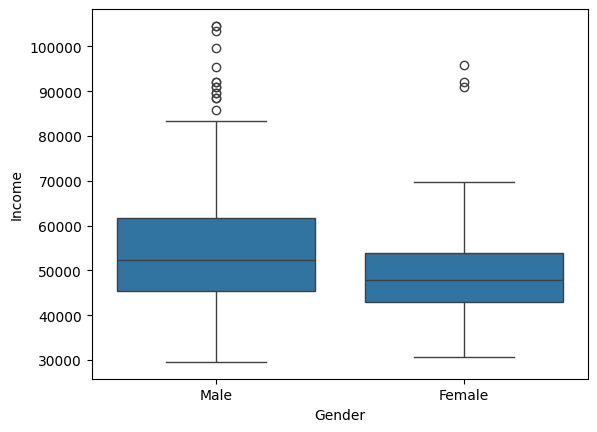

In [82]:
sns.boxplot(x = 'Gender', y = 'Income', data=df)

In [84]:
income_male = df[df['Gender'] == 'Male']['Income']
income_female = df[df['Gender'] == 'Female']['Income']


In [85]:
income_male.mean()

56562.75961538462

In [86]:
income_female.mean()

49828.90789473684

In [87]:
t_stat, p_val = ttest_ind(income_male, income_female, alternative='greater')
t_stat, p_val

(2.752488637540257, 0.003263631548607129)

In [88]:
alpha = 0.05 # 95% confidence

if p_val < alpha:
  print('Reject H0')
  print('Men earn more than females.')
else:
  print ('Fail to Reject H0')

Reject H0
Men earn more than females.


In [89]:
from scipy.stats import ttest_rel
import pandas as pd

In [90]:
!wget --no-check-certificate https://drive.google.com/uc?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae -O problem_solving.csv

--2024-05-05 07:16:19--  https://drive.google.com/uc?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae
Resolving drive.google.com (drive.google.com)... 173.194.211.139, 173.194.211.100, 173.194.211.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.211.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae [following]
--2024-05-05 07:16:19--  https://drive.usercontent.google.com/download?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1277 (1.2K) [application/octet-stream]
Saving to: ‘problem_solving.csv’

problem_solving.csv 100%[===================>]   1.25K  --.-KB/s    in 0s      

2024-05-05 07:16:19 (44

In [91]:
df_ps = pd.read_csv('problem_solving.csv')
df_ps.head()

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43


In [92]:
df_ps.describe()

,id,test_1,test_2
count,137.000000,137.000000,137.000000
mean,68.000000,60.489051,62.430657
std,39.692569,17.080311,17.516293
min,0.000000,30.000000,27.000000
25%,34.000000,46.000000,48.000000
50%,68.000000,59.000000,62.000000
75%,102.000000,75.000000,77.000000
max,136.000000,89.000000,96.000000


In [93]:
# H0 : Problem-solving has no effect
# Ha : problem-solving had an effect

statistics, pvalue = ttest_rel(df_ps['test_1'], df_ps['test_2'])
statistics, pvalue

(-5.502886353508166, 1.795840353792313e-07)

In [94]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Reject H0


In [95]:
stastic, pvalue = ttest_rel(df_ps['test_1'], df_ps['test_2'], alternative='less')
stastic, pvalue

(-5.502886353508166, 8.979201768961566e-08)

In [96]:
stastic, pvalue = ttest_rel(df_ps['test_1'], df_ps['test_2'], alternative='greater')
stastic, pvalue

(-5.502886353508166, 0.9999999102079823)

In [97]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Fail to Reject H0


Traditionally it is known that a green gram cultivation yields 12.0 quintals per hectare on an average.

In order to increase crop yields, scientists have developed a new variety of green grams, that can supposedly produce more than the expected average yield of 12 quintals per hectare.

To test the same, this variety of green grams was tested on 10 randomly selected farmer's fields.

The yield (quintals/hectare) was recorded as: [14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]

With a 5% significance level, can we conclude that the average yield of this variety of green grams is more than the expected yield (12 quintals/hectare)?

Perform an appropriate test and choose the correct option below :

In [105]:
samp = [14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]

t_stat, p_val = ttest_1samp(samp, 12, alternative='greater')
t_stat, p_val

(1.8356436949305335, 0.04979938002326665)

In [106]:
alpha = 0.05
if p_val < alpha:
  print('Reject')
else:
  print('Accept')

Reject


In [100]:
import numpy as np
from scipy import stats

# Given data
expected_mean = 12.0
sample_data = [14.3, 12.6, 13.7, 10.9, 13.7, 12.0, 11.4, 12.0, 12.6, 13.1]

# Calculate sample statistics
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)  # ddof=1 for sample standard deviation
n = len(sample_data)

# Calculate the t-statistic
t_statistic = (sample_mean - expected_mean) / (sample_std / np.sqrt(n))

# Degrees of freedom
df = n - 1

# Calculate the critical value
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha, df)

# Perform the test
p_value = 1 - stats.t.cdf(t_statistic, df)

# Check if the null hypothesis is rejected
if t_statistic > critical_value:
    print("Reject the null hypothesis. There is sufficient evidence to conclude that the average yield of the new variety of green grams is more than 12 quintals/hectare.")
else:
    print("Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the average yield of the new variety of green grams is more than 12 quintals/hectare.")

print("t-statistic:", t_statistic)
print("Critical value:", critical_value)
print("p-value:", p_value)


Reject the null hypothesis. There is sufficient evidence to conclude that the average yield of the new variety of green grams is more than 12 quintals/hectare.
t-statistic: 1.8356436949305341
Critical value: 1.8331129326536335
p-value: 0.04979938002326656


Samples of Body fat percentages of few gym going men and women are recorded.

men = [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0]
women = [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]
Perform an appropriate test to check if the mean body fat percentage of men and women is statistically different.

Assume the significance level to be 5%.

Choose the correct option below :

In [107]:
men = [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0]
women = [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]
t_stat, p_val = ttest_ind(men, women, alternative='two-sided')
t_stat, p_val

(-2.799960442832919, 0.010730607904197957)

In [108]:
alpha = 0.05
if p_val < alpha:
  print('Reject')
else:
  print('Accept')

Reject


The quality assurance department claims that on average the non-fat milk contains more than 190 mg of Calcium per 500 ml packet.

To check this claim 45 packets of milk are collected and the content of calcium is recorded.

Perform an appropriate test to check the claim with a 90% confidence level.

data = [193, 321, 222, 158, 176, 149, 154, 223, 233, 177, 280, 244, 138, 210, 167, 129, 254, 167, 194, 191, 128, 191, 144, 184, 330, 216, 212, 142, 216, 197, 231, 133, 205, 192, 195, 243, 224, 137, 234, 171, 176, 249, 222, 234, 191]


Note: Round off the answer to four decimal places.

In [109]:
data = [193, 321, 222, 158, 176, 149, 154, 223, 233, 177, 280, 244, 138, 210, 167, 129, 254, 167, 194, 191, 128, 191, 144, 184, 330, 216, 212, 142, 216, 197, 231, 133, 205, 192, 195, 243, 224, 137, 234, 171, 176, 249, 222, 234, 191]

In [110]:
t_stat, p_val = ttest_1samp(data, 190, alternative='greater')
print(t_stat, p_val)
"Reject" if p_val < 0.1 else "Accept"

1.3689029903414232 0.08898891556150607


'Reject'

There are 8 females and 12 males in a coaching class.

After a practice test, the coach wants to know whether the average score of females is greater than the average score of males.

Given data describes the scores of females and males in his class.

female_scores=[25,30,45,49,47,35,32,42]

male_scores=[45,47,25,22,29,32,27,28,40,49,50,33]

Use an appropriate test to check whether the assumption of the coach is significant or not, at a 2% significance level?

In [112]:
female_scores=[25,30,45,49,47,35,32,42]
male_scores=[45,47,25,22,29,32,27,28,40,49,50,33]
t_stat, p_val = ttest_ind(female_scores, male_scores, alternative='greater')
print(t_stat, p_val)
"Reject" if p_val < 0.02 else "Accept"

0.5795450171026676 0.2847023809445894


'Accept'

An experiment was performed to compare the effectiveness of Ammonium Chloride and urea on the grain yield (in quintal per hectare) and the results are given in the arrays below:

Ammonium_chloride = [13.4, 10.9, 11.2, 11.8, 14, 15.3, 14.2, 12.6, 17, 16.2, 16.5, 15.7]

Urea = [12, 11.7, 10.7, 11.2, 14.8, 14.4, 13.9, 13.7, 16.9, 16, 15.6, 16]
Conduct an appropriate test to compare the same with a 95% confidence level and choose the appropriate option below.

In [113]:
Ammonium_chloride = [13.4, 10.9, 11.2, 11.8, 14, 15.3, 14.2, 12.6, 17, 16.2, 16.5, 15.7]
Urea = [12, 11.7, 10.7, 11.2, 14.8, 14.4, 13.9, 13.7, 16.9, 16, 15.6, 16]

t_stat, p_val = ttest_ind(Ammonium_chloride, Urea, alternative='two-sided')
t_stat, p_val

(0.1846496543760765, 0.8551954147800473)

In [114]:
t_stat, p_val = ttest_ind(Ammonium_chloride, Urea, alternative='less')
t_stat, p_val

(0.1846496543760765, 0.5724022926099763)

In [115]:
t_stat, p_val = ttest_ind(Ammonium_chloride, Urea, alternative='greater')
t_stat, p_val

(0.1846496543760765, 0.4275977073900237)

The Zumba trainer claims to the customers, that their new dance routine helps to reduce more weight.

Weight of 8 people were recorded before and after following the new Zumba training for a month:

wt_before = [85, 74, 63.5, 69.4, 71.6, 65,90,78]

wt_after = [82, 71, 64, 65.2, 67.8, 64.7,95,77]

Test the trainer's claim with 90% confidence. Further, what would be the pvalue?

In [116]:
wt_before = [85, 74, 63.5, 69.4, 71.6, 65,90,78]

wt_after = [82, 71, 64, 65.2, 67.8, 64.7,95,77]

In [118]:
t_stat, p_val = ttest_rel(wt_before, wt_after, alternative='greater')
t_stat, p_val

(1.1421853793555032, 0.14546808501326386)

A certain company decided to roll out a new training regime for its employees.

To test which regime (old or new) would be preferred by the employees, they made 5 employees (who had earlier cleared the old regime) take part in the new training regime, and then score them both, out of 100.

Which of the following statistical procedures would be most appropriate to test the claim that employee overall scores are the same in both training regimes?

In [119]:
old = [70,90,87,83,97]
new = [73,88,90,85,98]

t_stat, p_val = ttest_rel(old,new, alternative='two-sided')
t_stat, p_val

(-1.5096588248481377, 0.20563995895070905)

You are appointed as a Data Analyst for a training program deployed by the Government of India.

The participants’ skills were tested before and after the training using some metrics on a scale of 10.

before = [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34]   

after = [7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20]

Conduct an appropriate test to assess a statistically significant increase in the average skill score after the training program, and then answer the below questions accordingly.

Note: Perform the test at alpha = 5%.

In [120]:
before = [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34]

after = [7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20]

In [121]:
t_stat, p_val = ttest_rel(before, after, alternative='two-sided')
t_stat, p_val

(-5.111096450191605, 0.0006355623963896455)

In [2]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel

The average British man is 175.3 cm tall. A survey recorded the heights of 10 UK men and we want to know whether the mean of the sample is different from the population mean.

survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

Perform an appropriate test and choose the correct option below, that we can conclude with a 5% significance.

In [3]:
survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
t_stat,p_val = ttest_1samp(survey_height, 175.3)
t_stat,p_val

(2.295568968083183, 0.04734137339747034)

In [4]:
t_stat,p_val = ttest_1samp(survey_height, 175.3, alternative='two-sided')
t_stat,p_val

(2.295568968083183, 0.04734137339747034)

Samples of IQ scores are collected from two competing schools, as follows:

school_1 = [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]
school_2 = [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]
Perform an appropriate test with a 5% significance level to check if there is any statistically significant difference in the mean IQ's of these schools.

Choose the correct option below :

In [5]:
school_1 = [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]
school_2 = [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]

t_stat, p_val = ttest_ind(school_1, school_2)
t_stat, p_val

(-0.36928503344341035, 0.7154458095186707)

A pharmaceutical company is developing a new drug to decrease the blood pressure. In a clinical trial, they measured the blood pressure of 30 participants before administering the new drug.

After a month of treatment, they measured the blood pressure again for the same group. The company wants to determine if there is a significant decrease in blood pressure after using the new drug.

Which hypothesis test should the company use, and what are the characteristics of the test?

## **LECT 5**

Consider planning a week of movie nights with your friends.   
You have a collection of seven different movie genres to choose from.   
To make things interesting, you decide that each movie night will feature a unique genre

Degrees of freedom

Imagine you have information about people's salaries.

You know the first person's salary is 35 lakhs, the second person's salary is 36 lakhs, and the third person's salary is missing.
But, you do know that the average (or mean) salary is 35 lakhs.

Can you figure out the missing salary?

In [8]:
34

34

Now, let's say you have more salary data.

You know the first person's salary is 35 lakhs, the second person's salary is 36 lakhs, the third person's salary is missing, and
the fourth person's salary is 30 lakhs.
Surprisingly, the average salary is 37 lakhs.

Can you find the missing salary?

In [9]:
(4*37) -(35+36+30)

47

Degree of Freedom (n-1) * (m-1)

Chi-square Goodness of fit test

Use Case: Coin Toss

The Chi-squared test for goodness of fit is used when you have one categorical variable, and you want to see if the observed frequencies match the expected frequencies.

Now, to understand it let's start with a simple example of a coin toss which we all relate to.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2

You have a coin. You wish to ensure that it is fair.

You decide to toss it 50 times, and note the observations.

The observed outcomes from 50 coin tosses are 28 heads and 22 tails.

Determine if the coin is fair or biased.

In [18]:
expected_heads = 25
expected_tails = 25
obs_heads = 28
obs_tails = 22
dof = 1
chi = (28-25)**2/25 + (22-25)**2/25
print(chi)

p_val = 1 - chi2.cdf(chi, df=1)
print(p_val)

0.72
0.3961439091520741


In [19]:
chi2.ppf(0.95, df=1)

3.841458820694124

In [14]:
chi_stat, p_val = chisquare(
                  [28,22],
                  [25,25])

chi_stat, p_val

(0.72, 0.3961439091520741)

In [17]:
alpha = 0.05

"Reject" if p_val < alpha else "Fail to Reject, coin is fair"

'Fail to Reject, coin is fair'

You decide to check if a different coin is fair or not, in similar way.

This time, the the observed outcomes from the 50 coin tosses are 45 heads and 5 tails.

Determine whether the coin is fair or biased.

In [3]:
chi_stat, p_val = chisquare(
                  [45, 5],
                  [25, 25]
                  )
chi_stat, p_val

(32.0, 1.5417257900280013e-08)

In [4]:
alpha = 0.05

if p_val < alpha:
    print("Reject H0")
    print("Coin is baised")
else:
    print("Fail to reject H0")
    print("Coin is fair")

Reject H0
Coin is baised


using the formula

In [5]:
(45-25)**2/25 + (5-25)**2/25

32.0

In [7]:
1 - chi2.cdf(32, df=1)

1.5417257914762672e-08

CHI-SQUARE INDIVIDUAL

For 2 Categories

Imagine you are running a Marketing Campaign in your company.

There are 2 modes through which customers can purchase the company's products: Offline and Online.

Your goal is to run a campaign that aims at increasing the number of online purchases.

Testing independence with chi2_contingency

$H_0$: Gender and preference are independent

$H_1$: Gender and preference are not independent

In this scenario, under the assumption of null hypothesis do we have the expected value?

Firstly, we observe that 66% of the respondents prefer offline and 34% of the respondents prefer online.

- Now, if gender has no impact then among 733 men, how many are expected to prefer offline? => 66% of 734 = 484
- Now, if gender has no impact then among 172 women, how many are expected to prefer offline? => 66% of 174 = 115
- Now, if gender has no impact then among 733 men, how many are expected to prefer online? => 34% of 734 = 249
- Now, if gender has no impact then among 172 women, how many are expected to prefer online? => 34% of 174 = 59

All the expected values are calculated using the observed values.

<br>


Therefore, we can calculate the chi-squared value as: $χ^2 = \frac{(527-484)^2}{484} + \frac{(72-115)^2}{115} + \frac{(206-249)^2}{249} + \frac{(102-59)^2}{59}$

In [2]:
from scipy.stats import chi2_contingency

In [9]:
observed = [
        [527, 72],
        [206, 102]
        ]
chi_stat, p_val, df, exp_freq = chi2_contingency(observed)
chi_stat, p_val, df, exp_freq

(57.04098674049609,
 4.268230756875865e-14,
 1,
 array([[484.08710033, 114.91289967],
        [248.91289967,  59.08710033]]))

In [10]:
alpha = 0.05

if p_val < alpha:
    print("Reject H0")
    print("Gender and preference are not independent")
else:
    print("Fail to reject H0")
    print("Gender and preference are independent")

Reject H0
Gender and preference are not independent


**AEROFIT example**

In [11]:
!wget --no-check-certificate https://drive.google.com/uc?id=12muEOrUvEtKAPVhKr4rSlrsqwjGuMJfu -O aerofit.csv

--2024-05-06 09:56:04--  https://drive.google.com/uc?id=12muEOrUvEtKAPVhKr4rSlrsqwjGuMJfu
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.100, 74.125.142.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12muEOrUvEtKAPVhKr4rSlrsqwjGuMJfu [following]
--2024-05-06 09:56:04--  https://drive.usercontent.google.com/download?id=12muEOrUvEtKAPVhKr4rSlrsqwjGuMJfu
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7461 (7.3K) [application/octet-stream]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.29K  --.-KB/s    in 0.001s  

2024-05-06 09:56:05 (12.9 MB/s) - ‘ae

In [12]:
df_aerofit = pd.read_csv('aerofit.csv')
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [13]:
gender_product = pd.crosstab(index=df_aerofit['Gender'], columns=df_aerofit['Product'])
gender_product

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [14]:
chi_stat, p_val, df, expected_freq = chi2_contingency(gender_product)

In [15]:
chi_stat, p_val, df, expected_freq

(12.923836032388664,
 0.0015617972833158714,
 2,
 array([[33.77777778, 25.33333333, 16.88888889],
        [46.22222222, 34.66666667, 23.11111111]]))

In [16]:
alpha = 0.05

if p_val < alpha:
    print("Reject H0")
    print("Gender impacts product")
else:
    print("Fail to reject H0")
    print("Gender does not impact product")

Reject H0
Gender impacts product


What should be the null and alternate hypothesis?

H0 : Gender does not impact the buying of product

H1 : Gender impacts the buying of product

In [18]:
gender_product = pd.crosstab(index=df_aerofit['Gender'],columns=df_aerofit['Product'])
gender_product # This will give the count of each gender for each product

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [20]:
chi_stat, p_val, df, exp_freq = chi2_contingency([[40,29],[40, 31]])
chi_stat, p_val, df, exp_freq

(0.0005953595971967067,
 0.9805335549105975,
 1,
 array([[39.42857143, 29.57142857],
        [40.57142857, 30.42857143]]))